In [5]:
import matplotlib.pyplot as plt
import math as m
import pandas as pd
from scipy.stats import norm 
import numpy as np

In [6]:
#Question1

#dW(t) = math.sqrt(dt) * Normal
def simulate_Xt(X0, t, steps, paths):
    dt = t/steps
    #path 代表simulate 多少次，代表每次需要generate多少个normal variable
    #【1 1 1 1 1】 【1 1.2 1.1 1.3 1.5】 path = 5 每次generate五个variable给他们每个加。  steps代表加多少次
    Xt = [np.array([X0]*paths)]
    for i in range(steps):
        Xt_current = Xt[-1]
        Xt.append(Xt_current + ((1/5) - (1/2)*Xt_current)*dt + (2/3)*math.sqrt(dt)* np.random.normal(0,1, paths))        
    return Xt[-1] 

def simulate_Yt(Y0, t, steps, paths):
    dt = t/steps
    Yt = [np.array([Y0]*paths)]
    for i in range(steps):
        Yt_current = Yt[-1]                                          #(i+1)*dt = t
        Yt.append(Yt_current + ((2/(((i+1)*dt) + 1))* Yt_current + (((i+1)*dt)**3 + 1)/3)*dt + (((i+1)*dt) **3 + 1)/3 *math.sqrt(dt) * np.random.normal(0, 1, paths))
    return Yt[-1]

def q1(X0, Y0):
    np.random.seed(2)
    X2 = simulate_Xt(X0=X0, t = 2, steps = 20000, paths = 2000)
    Y2 = simulate_Yt(Y0=Y0, t = 2, steps = 20000, paths = 2000)
    Y3 = simulate_Yt(Y0=Y0, t = 3, steps = 20000, paths = 2000)
    #同时simulate了2000次 所以除以2000 算prob
    P1 = (Y2 > 5).sum()/2000
    #expected value 也是除以
    E1 = sum(np.sign(X2) * np.absolute(X2)**(1./3.))/2000
    E2 = sum(Y3)/2000
    
    #注意这个怎么用
    fXY = list(map(lambda x2, y2: x2*y2 if x2 > 1 else 0, X2, Y2)) 
    E3 = sum(fXY)/2000
    print("P(Y2 > 5) = ", P1)
    print("e1 = ", round(E1,4))
    print("e2 = ", round(E2,4))
    print("e3 = ", round(E3,4))
    
q1(X0=1,Y0=0.75)

P(Y2 > 5) =  0.9765
e1 =  0.6429
e2 =  25.8033
e3 =  3.9006


In [7]:
#Question2
def simulate_Xt(X0, t, steps, paths):
    dt = t/steps
    Xt = [np.array([X0]*paths)]
    for i in range(steps):
        Xt_current = Xt[-1]
        Xt.append(Xt_current + ((1/4)*Xt_current) *dt + (1/3)*Xt_current * math.sqrt(dt)* np.random.normal(0, 1, paths)- (3/4)*Xt_current * math.sqrt(dt)* np.random.normal(0, 1, paths))     
    return Xt[-1]

def simulate_Yt(t, paths):
    Yt = np.exp(-0.08*t + (1/3)* math.sqrt(t)* np.random.normal(0, 1, paths)+ (3/4)* math.sqrt(t)* np.random.normal(0, 1, paths))
    return Yt

def q2(X0):
    np.random.seed(7)
    X1 = simulate_Xt(X0=X0, t = 1, steps = 1000, paths = 1000)
    X3 = simulate_Xt(X0=X0, t = 3, steps = 1000, paths = 1000)
    Y1 = simulate_Yt(t = 1, paths = 1000)
    E1 = sum(np.sign(1+X3) * np.absolute(1+X3)**(1./3.))/1000
    E2 = sum(X1*Y1)/1000
    print("e1 = ", round(E1, 4))
    print("e2 = ", round(E2,4))
q2(X0=1)

e1 =  1.3282
e2 =  1.6738


In [8]:
#Question3
def q3a(S0, sigma, T, X, r, dt=0.004):
    
    steps=int(T/dt)
    St = [np.array([S0]*10000)]
    St_minus = [np.array([S0]*10000)]
    Wt = []
    Wt_minus = []
    for i in range(steps):
        Wt.append(np.random.normal(0, 1, 10000))
        St_current = St[-1]
        #simulate 10000 stock prices 
        St.append(St_current+St_current*r*dt + St_current*sigma*math.sqrt(dt)* Wt[i]) 
    #the last 10000 stock prices
    ST = St[-1]
    
    for i in range(steps):
        #反的Wt
        Wt_minus.append(-Wt[i])
        St_minus_current = St_minus[-1]
        St_minus.append(St_minus_current+St_minus_current*r*dt + St_minus_current*sigma*math.sqrt(dt)* Wt[i]) 
    ST_minus = St_minus[-1]
    
    #正wt payoff
    payoff = np.array(list(map(lambda st: st - X if st - X > 0 else 0, ST)))
    #负wt payoff
    payoff_minus = np.array(list(map(lambda st_minus: st_minus - X if st_minus - X > 0 else 0, ST_minus)))
    payoff = (payoff + payoff_minus)/2
    C = m.exp(-r*T) * sum(payoff)/len(payoff)
    return C
q3a(S0=15, sigma=0.25, T=0.5, X=20, r=0.04, dt=0.004)

0.07645336857465555

In [9]:
#Chapter 3: normal cdf approximation
def N(x):
    d1 = 0.0498673470
    d2 = 0.0211410061 
    d3 = 0.0032776263
    d4 = 0.0000380036 
    d5 = 0.0000488906 
    d6 = 0.0000053830    
    if x > 0:
        N = 1 - (1/2)*(1 + d1*x + d2*x**2 + d3*x**3 + d4*x**4 + d5*x**5 + d6*x**6) **(-16) 
    else:
        N =  1 - (1 - (1/2)*(1 + d1*(-x) + d2*(-x)**2 + d3*(-x)**3 + d4*(-x)**4 + d5*(-x)**5 + d6*(-x)**6) **(-16) )    
    return N

In [10]:
def q3b(S0, sigma, T, X, r):
    d1 = (math.log(S0/X) + (r + 0.5*sigma**2)*T)/(sigma*math.sqrt(T))
    d2 = d1 - sigma*math.sqrt(T)
    C = S0*N(d1) - X*m.exp(-r*T)*N(d2) 
    return (C)
q3b(S0=15, sigma=0.25, T=0.5, X=20, r=0.04)

0.08575224964083072

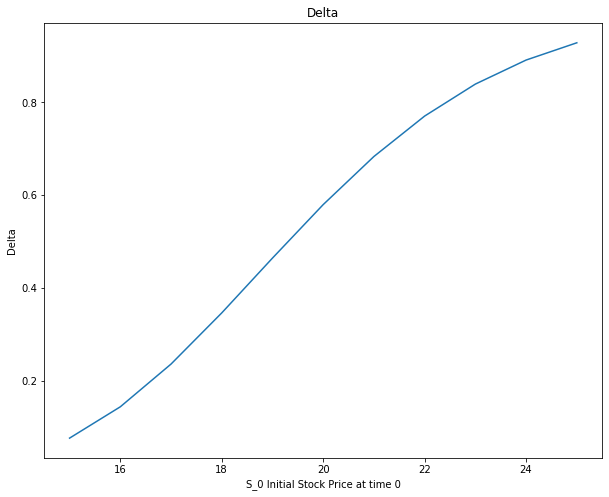

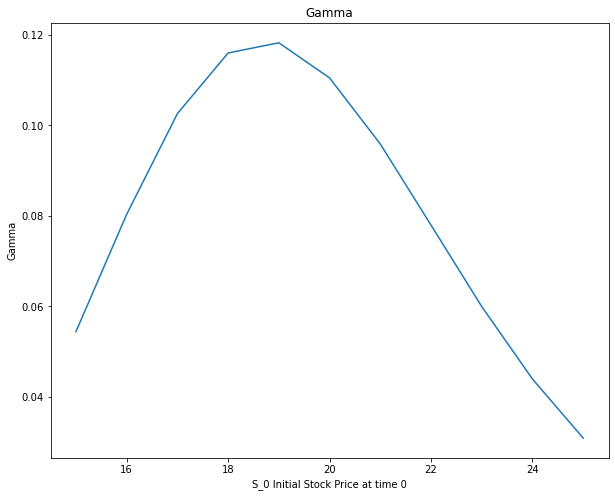

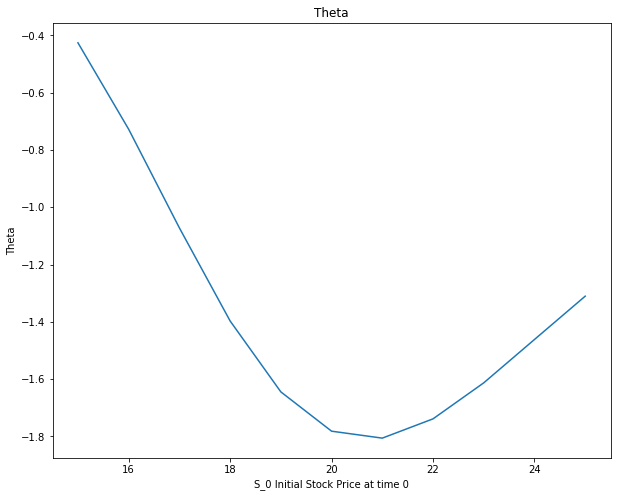

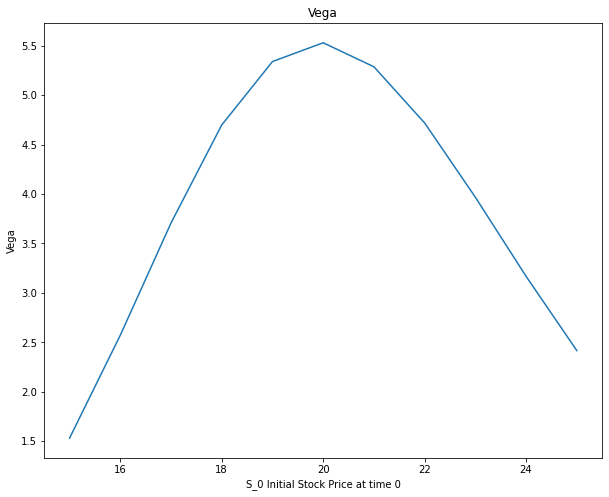

In [11]:
def q3c(S0_range, sigma, T, X, r):
    eps = 0.0001
    delta = [(q3b(S0_range[i] + eps, sigma, T, X, r) -  q3b(S0_range[i], sigma, T, X, r)) / eps for i in list(range(len(S0_range)))]
    gamma = [(q3b(S0_range[i] + eps, sigma, T, X, r) -  2* q3b(S0_range[i], sigma, T, X, r)+ q3b(S0_range[i] - eps, sigma, T, X, r))/ (eps)**2 for i in list(range(len(S0_range)))]
    theta = [-(q3b(S0_range[i], sigma, T + eps, X, r)  -  q3b(S0_range[i], sigma, T, X, r)) / eps for i in list(range(len(S0_range)))]
    vega = [(q3b(S0_range[i], sigma + eps, T, X, r)  -  q3b(S0_range[i], sigma, T, X, r)) / eps for i in list(range(len(S0_range)))]
    greeks = pd.DataFrame(columns=['Delta', 'Gamma', 'Theta', 'Vega'])
    greeks['Delta']=delta
    greeks['Gamma']=gamma
    greeks['Theta']=theta
    greeks['Vega']=vega
    for i in range(4):
        plt.figure(figsize=(10,8))
        plt.plot(S0_range, greeks.iloc[:, i])
        plt.title(greeks.columns.values.tolist()[i])
        plt.xlabel("S_0 Initial Stock Price at time 0")
        plt.ylabel(greeks.columns.values.tolist()[i])
        plt.show()
q3c(list(range(15, 26)), sigma=0.25, T=0.5, X=20, r=0.04)

In [12]:
#Question4
def simuW1W2(paths,rho):
    
    # 怎样生成两个correlated bm
    Z1 = np.random.normal(0,1, paths)
    Z2 = np.random.normal(0,1, paths)
    Z = np.array([Z1, Z2])
    cov = np.array([[1, rho],[rho, 1]])
    L = np.linalg.cholesky(cov)
    W1, W2 = L.dot(Z)   
    return [W1, W2]

def St_FT(t, steps, paths, a, b, V0, S0, r, sd,rho):
    dt = t/steps
    Vt = [np.array([V0]*paths)]
    St = [np.array([S0]*paths)]
    #full truncation implementation
    for i in range(1, steps + 1):
        dWt1 = np.sqrt(dt)* simuW1W2(paths,rho)[0]
        dWt2 = np.sqrt(dt)* simuW1W2(paths,rho)[1]
        Vt_current = Vt.pop()
        Vt_current_plus = Vt_current.copy()
        Vt_current_plus[Vt_current_plus < 0] = 0
        St_current = St.pop()
        St.append(St_current + r*St_current*dt + np.sqrt(Vt_current_plus)*St_current*dWt1)
        Vt.append(Vt_current + (a* (b - Vt_current_plus))*dt  + sd*np.sqrt(Vt_current_plus)*dWt2)    
    return St[0]

def St_PT(t, steps, paths, a, b, V0, S0, r, sd,rho):
    dt = t/steps
    Vt = [np.array([V0]*paths)]
    St = [np.array([S0]*paths)]
    #partial truncation implementation
    for i in range(1, steps + 1):
        dWt1 = np.sqrt(dt)* simuW1W2(paths,rho)[0]
        dWt2 = np.sqrt(dt)* simuW1W2(paths,rho)[1]
        Vt_current = Vt.pop()
        Vt_current_plus = Vt_current.copy()
        Vt_current_plus[Vt_current_plus < 0] = 0
        St_current = St.pop()
        St.append(St_current + r*St_current*dt + np.sqrt(Vt_current_plus)*St_current*dWt1)  
        Vt.append(Vt_current + (a* (b - Vt_current))*dt  + sd*np.sqrt(Vt_current_plus)*dWt2)        
    return St[0]

def St_R(t, steps, paths, a, b, V0, S0, r, sd,rho):
    dt = t/steps
    Vt = [np.array([V0]*paths)]
    St = [np.array([S0]*paths)]
    #reflection
    for i in range(1, steps + 1):
        dWt1 = np.sqrt(dt)* simuW1W2(paths,rho)[0]
        dWt2 = np.sqrt(dt)* simuW1W2(paths,rho)[1]
        Vt_current = Vt.pop()
        St_current = St.pop()
        St.append(St_current + r*St_current*dt + np.sqrt(abs(Vt_current))*St_current*dWt1)        
        Vt.append(abs(Vt_current) + (a* (b - abs(Vt_current)))*dt + sd*np.sqrt(abs(Vt_current))*dWt2) 
    return St[0]

def q4(rho, r, S0, K, T, V0, sigma, a, b):
    np.random.seed(999)
    steps=1000
    paths=1000
    st1 =  St_FT(T, steps, paths, a, b, V0, S0, r, sigma, rho)
    st2 = St_PT(T, steps, paths, a, b, V0, S0, r, sigma, rho)
    st3 = St_R(T, steps, paths, a, b, V0, S0, r, sigma, rho)
    payoffs_1 = st1 - K #calculate payoff
    payoffs_2 = st2 - K
    payoffs_3 = st3 - K   
    payoffs_1[payoffs_1 < 0] = 0
    payoffs_2[payoffs_2 < 0] = 0
    payoffs_3[payoffs_3 < 0] = 0   
    C1 = math.exp(-r*T) * sum(payoffs_1)/len(payoffs_1)
    C2 = math.exp(-r*T) * sum(payoffs_2)/len(payoffs_2)
    C3 = math.exp(-r*T) * sum(payoffs_3)/len(payoffs_3)
    print('Full Truncation Method:',C1)
    print('Partial Truncation Method:',C2)
    print('Reflection Method:',C3)
    
q4(rho=-0.6,r=0.03,S0=48,K=50,T=5,V0=0.05,sigma=0.42,a=5.8,b=0.0625)

Full Truncation Method: 13.277152070408174
Partial Truncation Method: 12.482376237441928
Reflection Method: 12.337691568518213


In [13]:
#Question5
def q5a(seed, n):
    x=seed
    list_LGM=[]
    for i in range(2*n):   
        x=(7**5*x)%(2**31-1)
        list_LGM.append(x/(2**31-1))
    Uni = list(zip(list_LGM[:n], list_LGM[n+1:]))
    return Uni

In [14]:
def Halton_1d(n, base):
    #halton sequence generator
    seq = [0]*n
    numbit = int(1 + np.ceil(np.log(n)/np.log(base)))
    vetbase = [base**(-i) for i in range(1, numbit+1)]
    for i in range(n):
        workvet = [0] * numbit
        num = i+1
        digit = []
        while num:
            num, rem = divmod(num, base)
            digit.append(rem)
        length = len(digit)
        for j in range(length):
            workvet[j] = digit[j]
        seq[i] = np.dot(workvet, vetbase)
    return seq
  #2 dimension 
def Halton_2d(n, base1, base2):  
    x = Halton_1d(n, base1)
    y = Halton_1d(n, base2)    
    halton_2d = list(zip(x,y))
    return halton_2d
def q5b():
    return Halton_2d(100, 2, 7)   

In [15]:
def q5c():
    return Halton_2d(100, 2, 4)

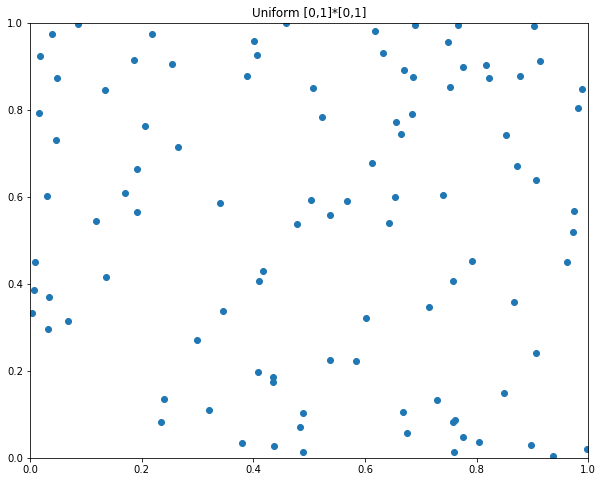

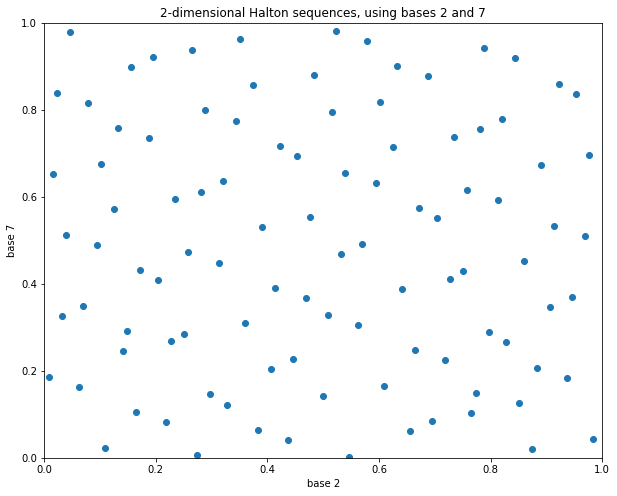

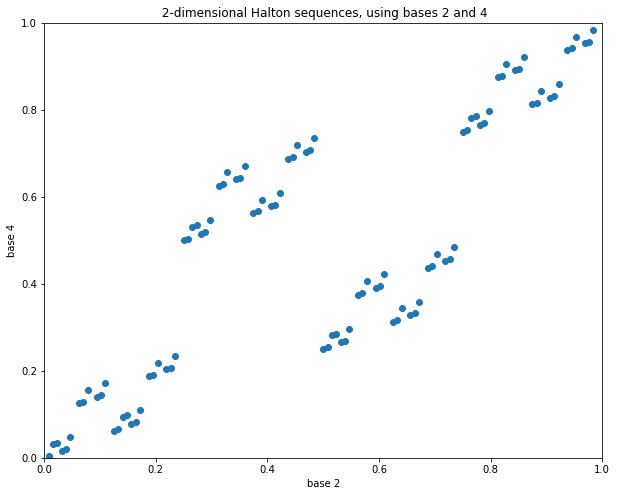

In [16]:
 #5a Graph
Uni = q5a(999,100)
HB = Halton_2d(100, 2, 7)
HC = Halton_2d(100, 2, 4)
plt.figure(figsize=(10,8))
plt.scatter(*zip(*Uni))   
plt.xlim((0, 1))
plt.ylim((0, 1))
plt.title("Uniform [0,1]*[0,1]")
plt.show()
 #5b Graph
plt.figure(figsize=(10,8))
plt.scatter(*zip(*HB))     
plt.title("2-dimensional Halton sequences, using bases 2 and 7")
plt.xlabel("base 2")
plt.ylabel("base 7")
plt.xlim((0, 1))
plt.ylim((0, 1))
plt.show()
 #5c Graph
plt.figure(figsize=(10,8))
plt.scatter(*zip(*HC))     
plt.title(" 2-dimensional Halton sequences, using bases 2 and 4")
plt.xlabel("base 2")
plt.ylabel("base 4")
plt.xlim((0, 1))
plt.ylim((0, 1))
plt.show()

Using LGM method, its distribution looks quite random and evenly enough; Using 2/7 base, the distribution also looks good; While for the 2/4 base, as 4 is not a prime number and being a multiplier of 2, the distribution indicates strong correlation between X and Y.

In [17]:
def integral(b1, b2):
    x1 = Halton_1d(10000, b1)
    x2 = Halton_1d(10000, b2)
    temp = []
    #做integral； 记得halton的个数要和simulation的次数一样
    for i in range(10000):    
        temp.append(np.exp(-x1[i]*x2[i])*(np.sin(6*np.pi*x1[i])+np.sign(np.cos(2*np.pi*x2[i]))*abs(np.cos(2*np.pi*x2[i]))**(1.0/3)))
    est = np.mean(temp)
    return est

def q5e():
    e1 = integral(2, 4)
    e2 = integral(2, 7)
    e3 = integral(5, 7)
    data = {'Methods':  ['2/4', '2/7 ', '5/7'],
            'Integral': [e1, e2, e3]}
    df = pd.DataFrame(data)
    return df

q5e()

,Methods,Integral
0,2/4,-0.004884
1,2/7,0.026114
2,5/7,0.026164
